# Lageparameter (Jupyter Notebook)

**Kurs Informatik – DHBW**
**Stand:** 17.12.2025
**Dozent:** Karsten Keßler

---

Dieses Notebook ergänzt das Kapitel **Lageparameter** mit rechenbaren Beispielen.

Behandelt werden:
- Arithmetisches Mittel (ungewichtet / gewichtet)
- Geometrisches Mittel
- Harmonisches Mittel
- Median und Modus
- Quantile (Quartile/Perzentile)
- Getrimmtes Mittel (robust)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.dpi': 120,
    'axes.spines.top': False,
    'axes.spines.right': False
})

## 1) Beispiel-Datensatz

Wir starten mit einem kleinen Datensatz (z. B. Punkte/Notenpunkte).

In [15]:
x = np.array([8, 10, 11, 14], dtype=float)
x

array([ 8., 10., 11., 14.])

## 2) Arithmetisches Mittel

Formel:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i
$$

In [16]:
x_mean = x.mean()
x_mean

np.float64(10.75)

### Ausreißer-Effekt: Mittel vs. Median
Ein einzelner großer Ausreißer kann den Mittelwert stark verschieben.

In [17]:
x2 = np.array([5, 6, 6, 7, 50], dtype=float)
mean_x2 = x2.mean()
median_x2 = np.median(x2)
mean_x2, median_x2

(np.float64(14.8), np.float64(6.0))

## 3) Gewichtetes arithmetisches Mittel

Beispiel: Klausur (60 %) und Projekt (40 %).

In [30]:
noten = np.array([1.7, 9.3])
gewichte = np.array([0.6, 0.4])

x_w = (gewichte * noten).sum()
x_w

np.float64(4.74)

## 4) Geometrisches Mittel

Für **positive** Werte (z. B. Wachstumsfaktoren):

$$
G = \left(\prod_{i=1}^{n} x_i\right)^{1/n}
$$

Beispiel: Wachstumsfaktoren $1.05, 0.97, 1.08$.

In [19]:
faktoren = np.array([1.05, 0.97, 1.08], dtype=float)

G = faktoren.prod() ** (1/len(faktoren))
G

np.float64(1.0322738591753262)

Optional: Log-Variante (numerisch stabiler):

$$
\ln G = \frac{1}{n}\sum_{i=1}^{n} \ln(x_i)
$$

In [20]:
G_log = np.exp(np.log(faktoren).mean())
G_log

np.float64(1.0322738591753262)

## 5) Harmonisches Mittel

Für positive Werte (typisch: **Raten** wie Geschwindigkeit):

$$
H = \left(\frac{1}{n} \sum_{i=1}^{n}\frac{1}{x_i}\right)^{-1}
$$

Beispiel: 100 km mit 60 km/h und 100 km mit 40 km/h.

In [21]:
v = np.array([60, 40], dtype=float)
H = 1 / ((1/v).mean())
H

np.float64(47.99999999999999)

## 6) Median und Modus

- Median: 50%-Quantil, robust gegenüber Ausreißern
- Modus: häufigste Ausprägung

In [22]:
daten = np.array([2, 3, 3, 7, 20], dtype=float)
median = np.median(daten)

# Modus: kann mehrere Werte haben (mehrgipflig)
werte, counts = np.unique(daten, return_counts=True)
modus_werte = werte[counts == counts.max()]
median, modus_werte

(np.float64(3.0), array([3.]))

## 7) Quantile (Quartile, Perzentile)

Wir verwenden NumPy-Quantile.

In [23]:
daten8 = np.array([1, 2, 3, 4, 6, 7, 9, 12], dtype=float)
q25, q50, q75 = np.quantile(daten8, [0.25, 0.5, 0.75])
q25, q50, q75

(np.float64(2.75), np.float64(5.0), np.float64(7.5))

## 8) Getrimmtes Mittel (robust)

Wir schneiden einen Anteil $\alpha$ links und rechts ab und bilden das Mittel der verbleibenden Werte.

In [24]:
def trimmed_mean(a, alpha=0.1):
    a = np.sort(np.asarray(a, dtype=float))
    n = len(a)
    k = int(np.floor(alpha * n))
    if 2*k >= n:
        raise ValueError('alpha zu groß für die Stichprobengröße')
    return a[k:n-k].mean()

x3 = np.array([5, 6, 6, 7, 50], dtype=float)
x3.mean(), np.median(x3), trimmed_mean(x3, alpha=0.2)

(np.float64(14.8), np.float64(6.0), np.float64(6.333333333333333))

## 9) Visualisierung (optional)

Ein Histogramm und ein Boxplot helfen, Ausreißer zu erkennen.

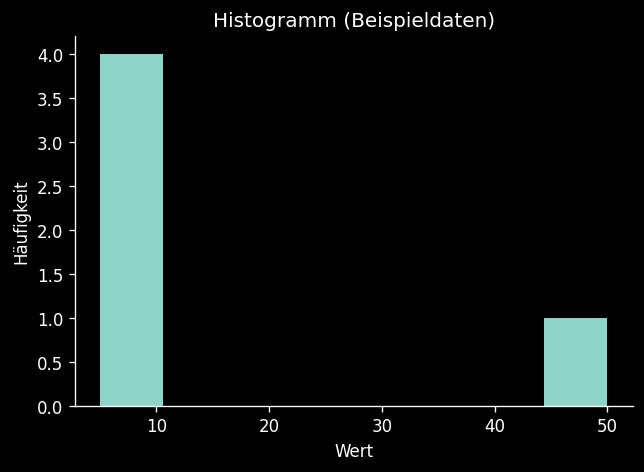

In [25]:
data_vis = x3

plt.figure(figsize=(6,4))
plt.hist(data_vis, bins=8)
plt.title('Histogramm (Beispieldaten)')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.show()

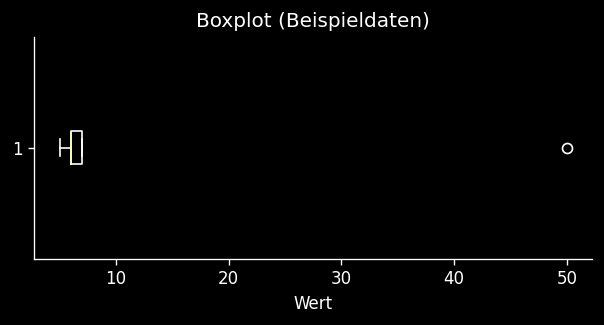

In [26]:
plt.figure(figsize=(6,2.4))
plt.boxplot(data_vis, vert=False)
plt.title('Boxplot (Beispieldaten)')
plt.xlabel('Wert')
plt.show()

## Merksätze

- Mittelwert: effizient, aber ausreißerempfindlich
- Median: robust, geeignet bei Ausreißern / schiefer Verteilung
- Geometrisches Mittel: Wachstumsraten (multiplikativ)
- Harmonisches Mittel: Raten (z. B. Geschwindigkeit bei gleicher Strecke)
- Gewichtetes Mittel: Teilnoten / Teilstichproben
